In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as sm
import warnings
warnings.filterwarnings("ignore")

#### With regard to the bikes dataset a ’naive’ forecast would be to use the count from the year before to predict the next year. The count from May 2011 as a forecast for May 2012 and checking how far off the predictions are:

### Loading Data

In [2]:
df = pd.read_csv("../data/dc_bikes_new.csv", index_col=0, parse_dates=["datetime"])

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,night


### Filtering out for May 2011

In [3]:
df_2011 = df[(df["datetime"].dt.year == 2011) & (df["datetime"].dt.month == 5)]

df_2011

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,part_of_day
2786,2011-05-01 00:00:00,2,0,0,1,17.22,21.210,67,6.0032,19.0,77.0,96,0,5,6,night
2787,2011-05-01 01:00:00,2,0,0,1,17.22,21.210,69,7.0015,9.0,50.0,59,1,5,6,night
2788,2011-05-01 02:00:00,2,0,0,1,17.22,21.210,77,7.0015,7.0,43.0,50,2,5,6,night
2789,2011-05-01 03:00:00,2,0,0,1,16.40,20.455,82,7.0015,8.0,15.0,23,3,5,6,night
2790,2011-05-01 04:00:00,2,0,0,1,16.40,20.455,76,7.0015,6.0,11.0,17,4,5,6,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2011-05-31 19:00:00,2,0,1,1,31.98,37.120,62,7.0015,NaN,NaN,407,19,5,1,evening
3526,2011-05-31 20:00:00,2,0,1,1,31.98,37.120,62,7.0015,NaN,NaN,310,20,5,1,evening
3527,2011-05-31 21:00:00,2,0,1,1,31.16,36.365,66,7.0015,NaN,NaN,224,21,5,1,night
3528,2011-05-31 22:00:00,2,0,1,1,30.34,34.850,70,11.0014,NaN,NaN,160,22,5,1,night


### Grouping by Datetime total number of rides for May 2011

In [4]:
df_2011 = df_2011[["datetime","count"]]

df_2011["datetime"] = df_2011["datetime"].dt.strftime("%d-%m")

df_2011 = round(df_2011.groupby("datetime")[["count"]].mean(),2)

df_2011

,count
datetime,
01-05,139.62
02-05,183.38
03-05,185.46
04-05,109.71
05-05,184.71
06-05,192.00
07-05,196.42
08-05,180.54
09-05,181.75


### Filtering and Grouping by Datetime total number of rides for May 2012

In [5]:
df_2012 = df[(df["datetime"].dt.year == 2012) & (df["datetime"].dt.month == 5)]

df_2012 = df_2012[["datetime","count"]]

df_2012["datetime"] = df_2012["datetime"].dt.strftime("%d-%m")

df_2012 = round(df_2012.groupby("datetime")[["count"]].mean(),2)

df_2012

,count
datetime,
01-05,239.17
02-05,257.04
03-05,267.54
04-05,262.33
05-05,286.79
06-05,264.96
07-05,261.38
08-05,238.67
09-05,196.54


In [6]:
df_merged = df_2011.merge(right = df_2012, how = 'left', on = 'datetime') #merging tables together

In [7]:
df_merged.rename(columns={"count_x" : 2011,"count_y" :2012}, inplace=True) # renaming column names

df_merged

,2011,2012
datetime,,
01-05,139.62,239.17
02-05,183.38,257.04
03-05,185.46,267.54
04-05,109.71,262.33
05-05,184.71,286.79
06-05,192.00,264.96
07-05,196.42,261.38
08-05,180.54,238.67
09-05,181.75,196.54


### Lineplot for showcasing Actual vs Forecast ride counts for 2012

Text(0, 257.5770967741936, 'Mean of actual count')

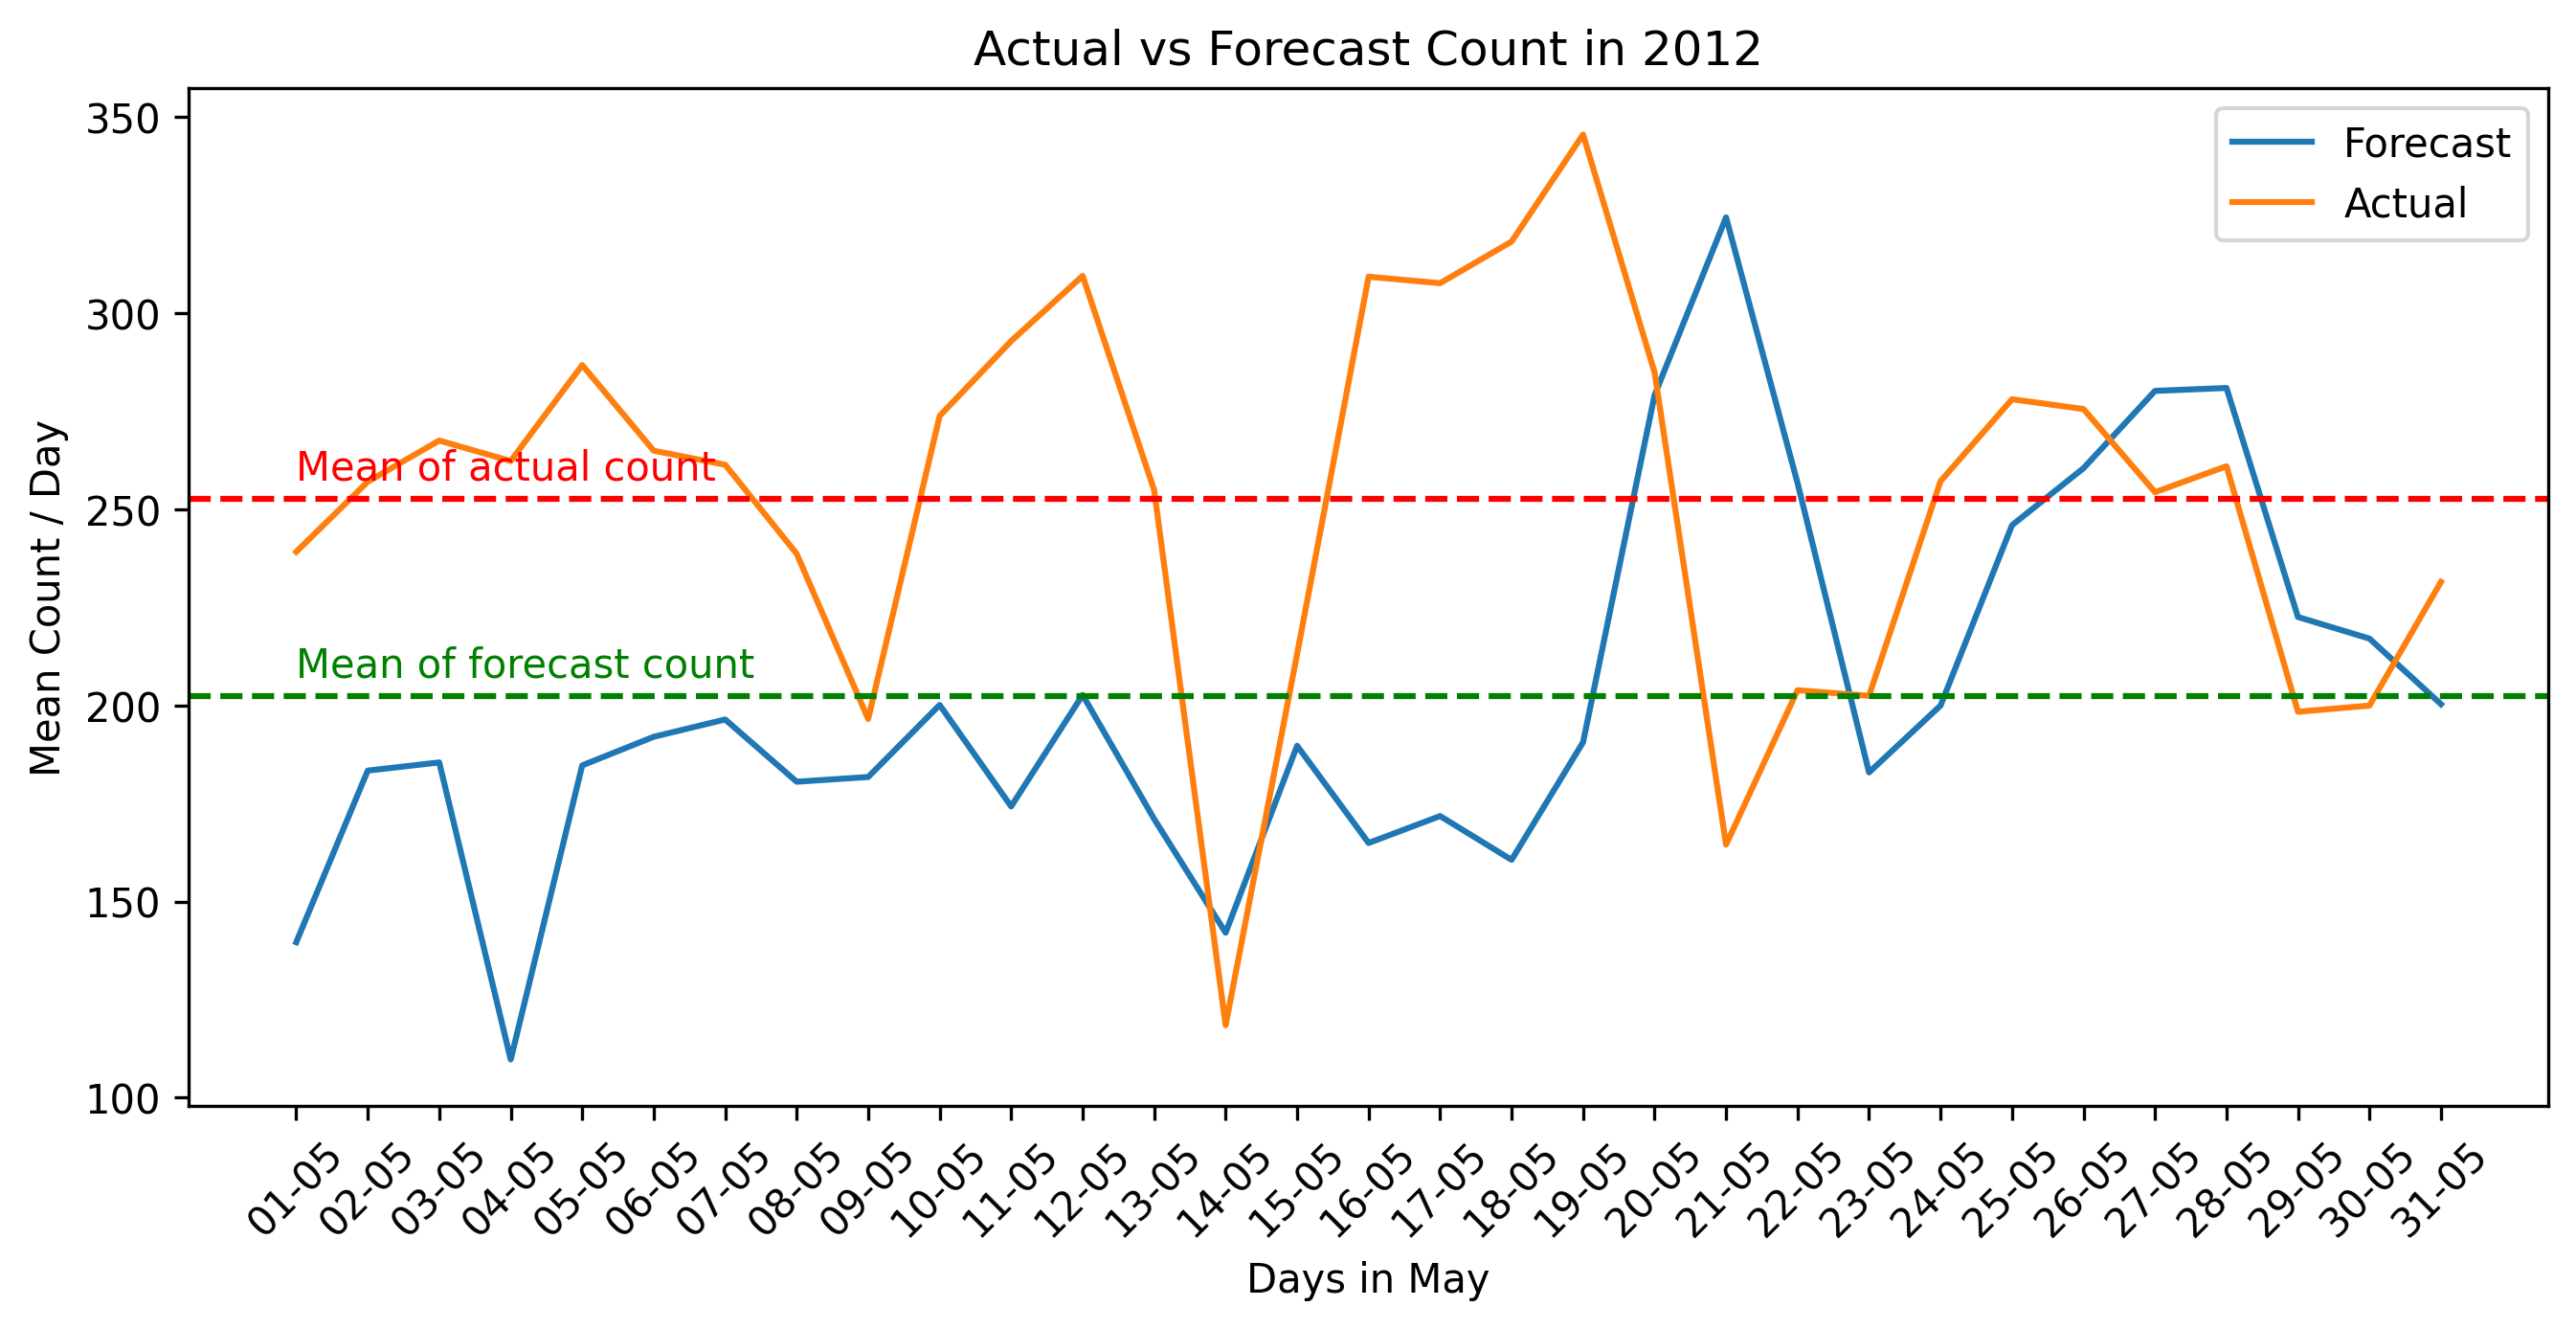

In [8]:
plt.figure(figsize=(10.6,4.6), dpi = 300)

sns.lineplot(x = 'datetime', y = 2011, data = df_merged, label = "Forecast")
sns.lineplot(x = 'datetime', y = 2012, data = df_merged, label = "Actual")

plt.title("Actual vs Forecast Count in 2012")

plt.ylabel("Mean Count / Day")
plt.xlabel("Days in May")
plt.legend();
plt.xticks(rotation = 45);

plt.axhline(df_2011["count"].mean(), color='green', ls='--')
plt.text(0, df_2011["count"].mean()+5, "Mean of forecast count", color='green')

plt.axhline(df_2012["count"].mean(), color='red', ls='--')
plt.text(0, df_2012["count"].mean()+5, "Mean of actual count", color='red')

### Root Means Square method for capturing the error of the model

In [9]:
sm.rmse(df_2011["count"],df_2012["count"]) 

86.58993827043314